In [3]:
import csv
import os
import numpy as np
import librosa
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf
import matplotlib.pyplot as plt

2023-08-25 14:22:52.649006: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset_path = "data/training/"

In [3]:
header = 'filename'
for i in range(1, 41):
  header += f' mfcc{i}'
header += ' label'
header = header.split()

In [4]:
file = open('data_1.csv', 'w', newline='')
with file:
  writer = csv.writer(file)
  writer.writerow(header)

for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:
          semantic_label = dirpath.split("/")[-1]
          print("\nProcessing: {}".format(semantic_label))
          for f in filenames:
              file_path = os.path.join(dirpath, f)
              to_append = f'{file_path}'
              # print(file_path)
              y, sr = librosa.load(file_path, mono=True, duration=3, sr=8000)
              mfcc = librosa.feature.mfcc(y=y, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
              for e in mfcc:
                  to_append += f' {np.mean(e.T, axis=0)}'
              to_append += f' {semantic_label}'
              file = open('data_1.csv', 'a', newline='')
              with file:
                  writer = csv.writer(file)
                  writer.writerow(to_append.split())


Processing: MR

Processing: AS

Processing: N

Processing: MS

Processing: MVP


In [5]:
data = pd.read_csv('data_1.csv')
data.head()


,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40,label
0,data/training/MR/New_MR_013.wav,-561.301025,155.022980,93.642532,50.721996,23.271015,17.649740,4.087108,-0.790157,-5.714567,...,-2.943175,-2.774009,-1.756414,-1.261873,-1.980241,-2.193557,-1.289309,-0.940492,-1.250548,MR
1,data/training/MR/New_MR_174.wav,-381.118927,144.878494,66.058075,32.868755,11.143325,5.073029,-5.344355,-6.968649,-9.318002,...,-1.317647,-2.707652,-2.072163,-1.451433,-2.278848,-1.087111,-1.206650,-0.956286,1.023181,MR
2,data/training/MR/New_MR_182.wav,-381.642578,149.215332,67.535118,31.597643,8.938404,5.797061,-6.082140,-7.110547,-8.396083,...,0.615877,-0.999692,-1.715032,-2.823085,-2.328232,-1.655436,-0.727405,-0.387553,-0.455695,MR
3,data/training/MR/New_MR_005.wav,-487.026276,163.969498,104.493271,59.541115,29.155336,25.178791,9.755599,1.182872,-4.286721,...,-1.640298,-4.263674,-2.385726,-1.368698,-2.428554,-2.532723,-1.132026,-0.605489,-1.341939,MR
4,data/training/MR/New_MR_067.wav,-425.867340,146.234711,67.267784,32.912254,5.509755,5.812193,-6.012776,-5.762486,-9.480924,...,0.606438,-1.934377,-2.707426,-1.291925,-2.931485,-1.865651,-0.566616,0.596293,-0.692505,MR


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  1000 non-null   object 
 1   mfcc1     1000 non-null   float64
 2   mfcc2     1000 non-null   float64
 3   mfcc3     1000 non-null   float64
 4   mfcc4     1000 non-null   float64
 5   mfcc5     1000 non-null   float64
 6   mfcc6     1000 non-null   float64
 7   mfcc7     1000 non-null   float64
 8   mfcc8     1000 non-null   float64
 9   mfcc9     1000 non-null   float64
 10  mfcc10    1000 non-null   float64
 11  mfcc11    1000 non-null   float64
 12  mfcc12    1000 non-null   float64
 13  mfcc13    1000 non-null   float64
 14  mfcc14    1000 non-null   float64
 15  mfcc15    1000 non-null   float64
 16  mfcc16    1000 non-null   float64
 17  mfcc17    1000 non-null   float64
 18  mfcc18    1000 non-null   float64
 19  mfcc19    1000 non-null   float64
 20  mfcc20    1000 non-null   float

In [7]:
scaler = StandardScaler()
X = data.drop(['label', 'filename'], axis=1)
X = scaler.fit_transform(X)
# X = np.reshape(X, (-1, X.shape[0], X.shape[1], 1))
y = data.iloc[:, -1]

In [8]:
X.shape

(1000, 40)

In [9]:
y.head()

0    MR
1    MR
2    MR
3    MR
4    MR
Name: label, dtype: object

In [10]:
X

array([[-2.90010007,  1.53116257,  1.67424877, ...,  0.01750527,
         0.14969323, -0.07461997],
       [ 0.67799387,  1.01349152,  0.0498636 , ...,  0.0697989 ,
         0.13856457,  1.57191769],
       [ 0.66759509,  1.23479948,  0.13684327, ...,  0.37298989,
         0.53930756,  0.50097859],
       ...,
       [-0.1263006 ,  0.64187785,  0.90058981, ...,  4.06122109,
         3.16653942,  2.84888317],
       [-0.48037767,  0.47805784,  0.34642402, ...,  2.20523125,
         2.80843085,  2.61389214],
       [ 0.63801322,  0.62380687, -0.66268666, ...,  0.08938006,
         0.20699407, -0.71180294]])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
y_test.shape

(200,)

In [13]:
X_train.shape

(800, 40)

In [14]:
X_train

array([[-0.13230631,  0.99203029,  0.16740986, ..., -0.05815258,
         0.69412604,  1.60468913],
       [ 0.20823339,  0.03670529,  0.29329921, ..., -0.11010788,
         0.37620922,  0.17420831],
       [-0.82509591,  0.83089118,  0.94059573, ...,  0.21279789,
         0.45295723, -0.78596223],
       ...,
       [-1.1881082 , -0.99734231,  0.02015827, ..., -1.29199897,
        -0.70903708, -0.07008542],
       [ 0.39138005, -0.7561748 , -0.37801928, ..., -0.9161895 ,
        -1.5409592 , -1.58677184],
       [ 0.61940948,  1.27268951, -0.01188734, ..., -0.04019808,
         0.90196728,  1.46805011]])

In [15]:
lb = LabelEncoder()
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
print(y_test.shape)
y_test = tf.keras.utils.to_categorical(lb.fit_transform(y_test))
y_train = tf.keras.utils.to_categorical(lb.fit_transform(y_train))
print(X_train.shape)
print(X_test.shape)



(200,)
(800, 40, 1)
(200, 40, 1)


In [16]:
def build_model():
    model = models.Sequential(
        [
            layers.Conv1D(64, (3), activation="relu", input_shape=(X_train.shape[1], 1)),
            layers.MaxPooling1D((3), strides=(2), padding="same"),

            layers.Conv1D(32, (3) , activation="relu"),
            layers.MaxPooling1D((3), strides=(2), padding="same"),

            layers.Flatten(),
            layers.Dense(64, activation="relu"),
            layers.Dense(5, activation="softmax"),
        ]
    )

    return model

In [17]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 38, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 9, 32)            0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 64)                1

2023-08-25 13:36:30.714412: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-25 13:36:30.715972: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [18]:
optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimazer, loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
25/25 [==============================] - 1s 23ms/step - loss: 1.5770 - acc: 0.3613 - val_loss: 1.5450 - val_acc: 0.5150
Epoch 2/30
25/25 [==============================] - 0s 11ms/step - loss: 1.5160 - acc: 0.5075 - val_loss: 1.4853 - val_acc: 0.5700
Epoch 3/30
25/25 [==============================] - 0s 15ms/step - loss: 1.4419 - acc: 0.5750 - val_loss: 1.4038 - val_acc: 0.5550
Epoch 4/30
25/25 [==============================] - 0s 14ms/step - loss: 1.3457 - acc: 0.5900 - val_loss: 1.2984 - val_acc: 0.6400
Epoch 5/30
25/25 [==============================] - 0s 12ms/step - loss: 1.2352 - acc: 0.6488 - val_loss: 1.1854 - val_acc: 0.6650
Epoch 6/30
25/25 [==============================] - 0s 10ms/step - loss: 1.1207 - acc: 0.6737 - val_loss: 1.0755 - val_acc: 0.7000
Epoch 7/30
25/25 [==============================] - 0s 10ms/step - loss: 1.0152 - acc: 0.7075 - val_loss: 0.9767 - val_acc: 0.7500
Epoch 8/30
25/25 [==============================] - 0s 10ms/step - loss: 0.9265 - a

7/7 [==============================] - 0s 8ms/step - loss: 0.3590 - acc: 0.9100
Accuracy on test set is: 0.9100000262260437


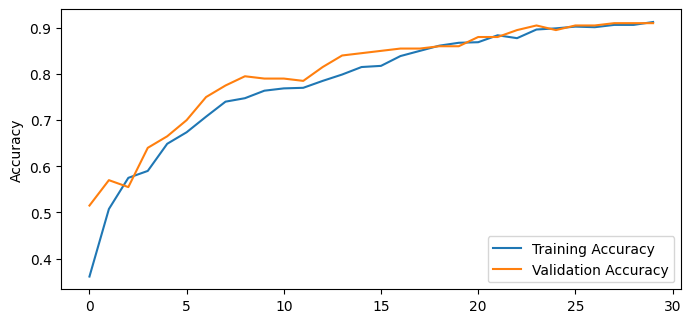

In [19]:
# evaluate model on test set
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))


# plot accuracy/error for training and validation
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
model.save('model_mfcc.h5')

### Testing

In [20]:
new_model = tf.keras.models.load_model('model_mfcc.h5')
new_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 38, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 9, 32)            0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 64)                1

In [24]:
import wave
import json
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' label'
header = header.split()


def extract_mfcc(audiofile):
    file = open('test.csv', 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
    mfcc = librosa.feature.mfcc(y=y, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
    to_append = f'Signal'
    for e in mfcc:
        to_append += f' {np.mean(e.T, axis=0)}'
    file = open('test.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

def predictCoba(audio):
    model = tf.keras.models.load_model('model_mfcc.h5')
    extract_mfcc(audio)
    data = pd.read_csv('test.csv')
    X = data.drop(['filename','label'], axis=1)
    X = np.array(X)
    X = np.expand_dims(X, axis=2)
    pred = model.predict(X)
    print(pred)
    pred = np.argmax(pred, axis=1)
    print(pred)


def predik(audio):
    dt_audio = audio
    model = 'model_mfcc.tflite'
    extract_mfcc(dt_audio)
    data = pd.read_csv('test.csv')
    data = data.drop(['filename','label'], axis=1)
    X = np.array(data.iloc[:, :-1], dtype=float)

    # Load TFLite model and allocate tensors.
    interpreter = tf.lite.Interpreter(model_path=model)
    interpreter.allocate_tensors()

    # Get input and output tensors.
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Test model on random input data.
    input_shape = input_details[0]['shape']
    input_data = np.array(X, dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)

    
    interpreter.invoke()

    # The function `get_tensor()` returns a copy of the tensor data.
    # Use `tensor()` in order to get a pointer to the tensor.
    output_data = interpreter.get_tensor(output_details[0]['index'])

    hasil = np.argmax(output_data)

    spf = wave.open(dt_audio, 'r')
    signal = spf.readframes(-1)
    signal = np.fromstring(signal, dtype='int16')
    fs = spf.getframerate()
    Time = np.linspace(0, len(signal) / fs, num=len(signal))

    path_dir = {}
    path_dir['z'] = f' {hasil}'
    path_dir['y'] = f' {signal}'
    path_dir['x'] = f' {Time}'
    # print(json.dumps(path_dir, separators=(',', ':')))
    return json.dumps({"file": audio, "hasil": str(hasil)})

In [26]:
predictCoba('data/training/N/New_N_003.wav')

1/1 [==============================] - 0s 115ms/step
[[0.0000000e+00 4.8198518e-36 1.0000000e+00 0.0000000e+00 1.1326858e-23]]
[2]
